<a href="https://colab.research.google.com/github/QUADRIABUBAKAR/ACCESS-Data-science-assignment/blob/main/Week_3/week3_session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#we load the data

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART A - Data Overview & Inspection

In [4]:
#Display the first 5 rows of the dataset.
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,WINE,0.00,0.0,2.0,2.00,2020-01-01
1,2020,1,PWSWN INC,100024,WINE,0.00,1.0,4.0,4.00,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,BEER,0.00,0.0,1.0,1.00,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,WINE,0.00,0.0,1.0,1.00,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,WINE,0.82,0.0,0.0,0.82,2020-01-01


In [5]:
#Display the last 5 rows of the dataset.
df.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
307640,2020,9,LEGENDS LTD,99753,BEER,0.00,0.0,5.00,5.00,2020-09-01
307641,2020,9,ANHEUSER BUSCH INC,9997,BEER,66.12,37.0,240.75,306.87,2020-09-01
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,BEER,2.25,0.0,0.00,2.25,2020-09-01
307643,2020,9,BOSTON BEER CORPORATION,99990,BEER,20.50,0.0,0.00,20.50,2020-09-01
307644,2020,9,UNKNOWN,WC,REF,0.00,0.0,-70.00,-70.00,2020-09-01


In [6]:
#Number of rows and columns
df.shape

(307645, 10)

In [7]:
#Column names
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM TYPE', 'RETAIL SALES',
       'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES', 'DATE'],
      dtype='object')

In [8]:
#Data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.00,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.00,12.00
RETAIL SALES,307645.0,7.024003,30.986095,-6.49,0.0,0.32,3.26,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.00,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.00,18317.00
TOTAL SALES,307645.0,32.318600,266.486255,-7800.00,1.0,2.68,10.50,19491.00


 i noticed that there was a miscalculation on 2nd row of the "TOTAL SALES" column,
 to correct it, i will redefine the total sales column

In [9]:
df["TOTAL SALES"] = df["RETAIL SALES"] + df["RETAIL TRANSFERS"] + df["WAREHOUSE SALES"]

In [ ]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,WINE,0.00,0.0,2.0,2.00,2020-01-01
1,2020,1,PWSWN INC,100024,WINE,0.00,1.0,4.0,5.00,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,BEER,0.00,0.0,1.0,1.00,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,WINE,0.00,0.0,1.0,1.00,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,WINE,0.82,0.0,0.0,0.82,2020-01-01


In [10]:
#we are seperating the values column from the string columns
numeric = df.columns[df.dtypes != "object"]
cat = df.columns[df.dtypes == "object"]

In [11]:
print(numeric)
print(cat)

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES'],
      dtype='object')
Index(['SUPPLIER', 'ITEM CODE', 'ITEM TYPE', 'DATE'], dtype='object')


In [12]:
#checking the number of unique values in the categorical column
for col in cat:
  print(col, df[col].nunique())

SUPPLIER 397
ITEM CODE 34056
ITEM TYPE 8
DATE 24


In [15]:
#checking the number of unique values in the categorical column
for col in numeric:
  print(col, df[col].nunique())

YEAR 4
MONTH 12
RETAIL SALES 10674
RETAIL TRANSFERS 2504
WAREHOUSE SALES 4895
TOTAL SALES 24114


In [ ]:
print("\nCategorical overview (top values):")
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES']:
    if col in df.columns:
        print(f"\nTop values for {col}:")
        display(df[col].value_counts().head(10))


Categorical overview (top values):

Top values for RETAIL SALES:


RETAIL SALES
0.00    121705
0.08     10664
0.17      6819
0.16      6091
0.24      3921
0.34      3487
0.33      2668
0.32      2559
0.25      2490
0.51      2243
Name: count, dtype: int64


Top values for RETAIL TRANSFERS:


RETAIL TRANSFERS
0.0    188464
1.0     23735
2.0     12560
3.0      8356
4.0      6516
5.0      5256
6.0      4523
7.0      3669
8.0      3384
9.0      2799
Name: count, dtype: int64


Top values for WAREHOUSE SALES:


WAREHOUSE SALES
0.0    96950
1.0    65178
2.0    30527
3.0    17844
4.0    12400
5.0     9093
6.0     7109
7.0     5462
8.0     4599
9.0     3840
Name: count, dtype: int64


Top values for TOTAL SALES:


TOTAL SALES
1.00    50124
2.00    21265
3.00    11244
0.08     7347
4.00     7280
0.17     5064
5.00     5037
0.16     3930
6.00     3740
7.00     2637
Name: count, dtype: int64

There are outliers that can affect our eda, which is 0 for basically all the sales column

# PART B - Univariate Analysis

### Numerical Analysis
so we choose the TOTAL SALES column

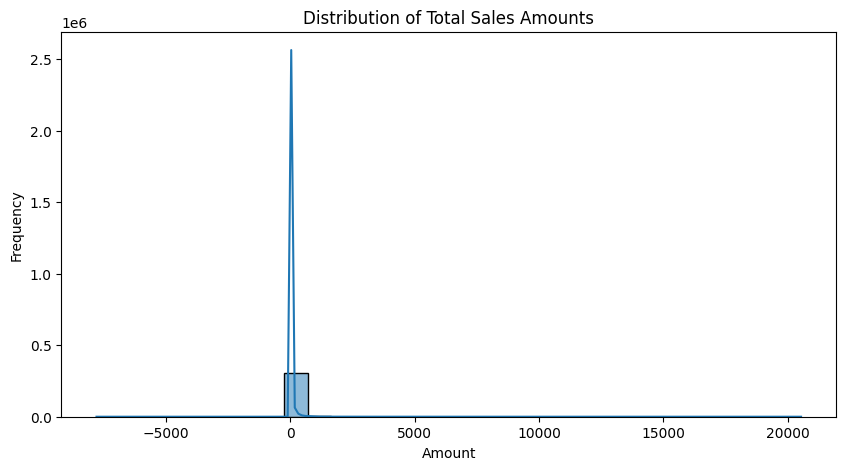

In [18]:

plt.figure(figsize=(10, 5))
sns.histplot(df["TOTAL SALES"], bins = 30, kde = True)
plt.title("Distribution of Total Sales Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

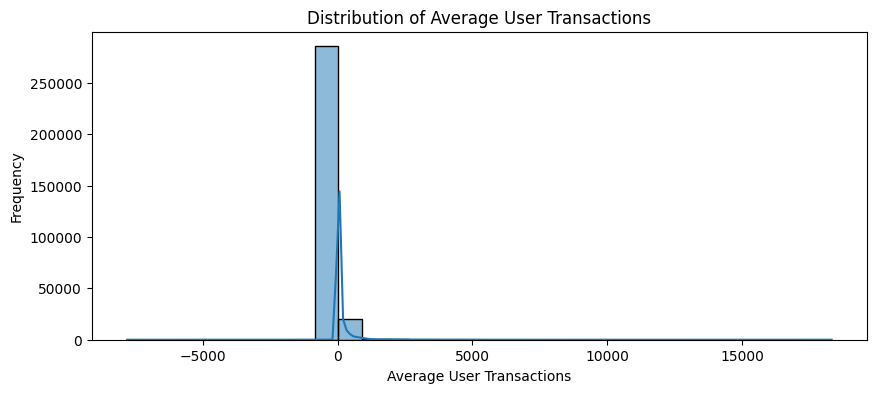

In [21]:
#Create:A histogram
plt.figure(figsize=(10, 4))
sns.histplot(df["WAREHOUSE SALES"], bins = 30, kde = True)
plt.title("Distribution of Average User Transactions")
plt.xlabel("Average User Transactions")
plt.ylabel("Frequency")
plt.show();

In [22]:
cat

Index(['SUPPLIER', 'ITEM CODE', 'ITEM TYPE', 'DATE'], dtype='object')

In [24]:
df["ITEM TYPE"]

,ITEM TYPE
0,WINE
1,WINE
2,BEER
3,WINE
4,WINE
...,...
307640,BEER
307641,BEER
307642,BEER
307643,BEER


/tmp/ipython-input-4051386290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['ITEM TYPE'], palette = "magma")


Text(0, 0.5, 'Item types')

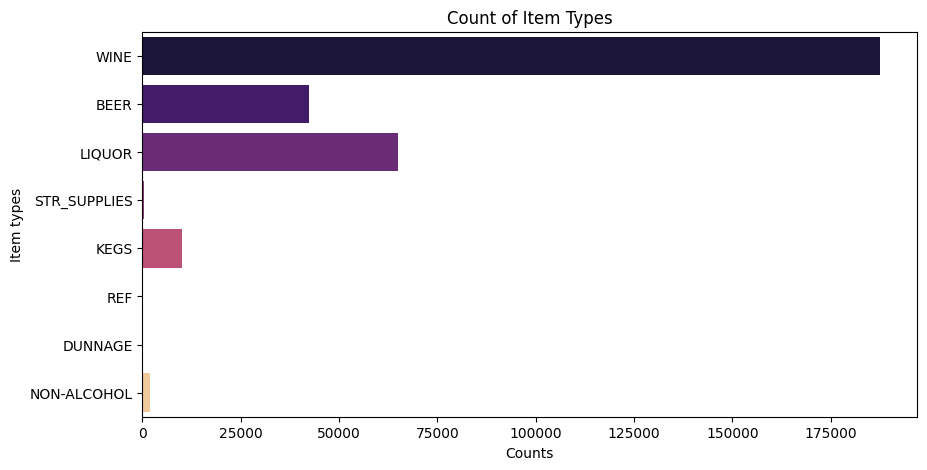

In [26]:
# Count of Item type
plt.figure(figsize=(10, 5))
sns.countplot(df['ITEM TYPE'], palette = "magma")
plt.title('Count of Item Types')
plt.xlabel('Counts')
plt.ylabel('Item types')

#BIVARIATE ANALYSIS
Items with highest Total and average sales

In [27]:
# Overall Total Sales(Warehouse and Retail) and Average Total Sales by Item Type
df.groupby('ITEM TYPE')['TOTAL SALES'].agg({'mean', 'sum'}).sort_values('sum', ascending=False).reset_index()

,ITEM TYPE,mean,sum
0,BEER,180.797657,7668171.04
1,WINE,14.059308,2638102.54
2,LIQUOR,26.071998,1692333.41
3,KEGS,11.672580,118430.00
4,NON-ALCOHOL,45.545220,86900.28
5,STR_SUPPLIES,33.549284,13587.46
6,REF,-153.121654,-19446.45
7,DUNNAGE,-1278.463158,-121454.00


Text(0, 0.5, 'Total Sales')

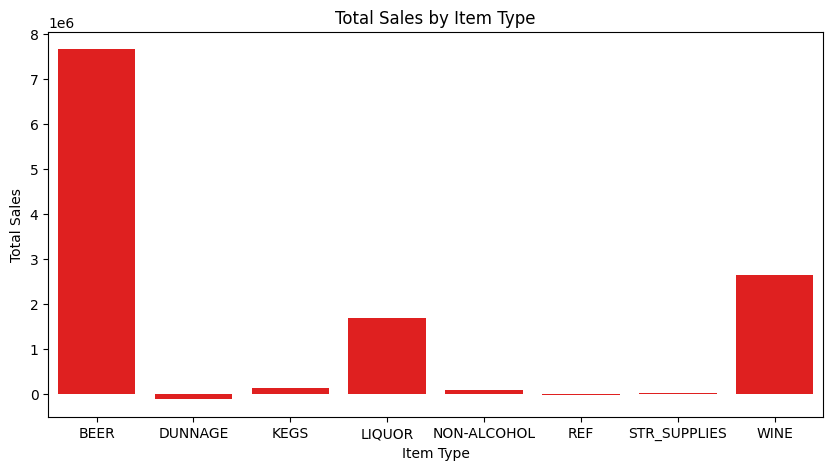

In [28]:
# Total Sales by Item Type
cat_total = df.groupby('ITEM TYPE')['TOTAL SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='red')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

## OUTLIER DETECTION

In [29]:
def find_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

outliers_amount = find_iqr_outliers(df['TOTAL SALES'].dropna())
print("IQR-based outliers in TOTAL SALES (count):", outliers_amount.shape[0])
display(outliers_amount.tail())

IQR-based outliers in TOTAL SALES (count): 46212


,TOTAL SALES
307636,342.00
307637,58.00
307639,123.00
307641,343.87
307644,-70.00


In [ ]:
df.describe().T

Text(0.5, 1.0, 'Distribution of Total Sales')

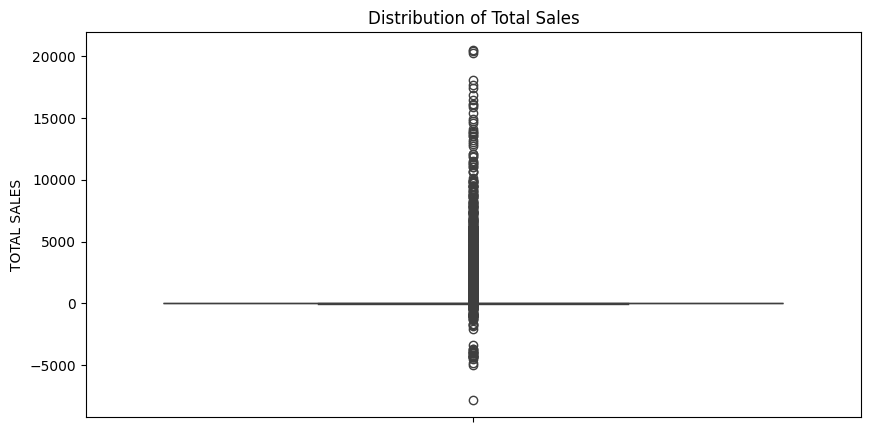

In [30]:
# Distribution of Total Sales with Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(df['TOTAL SALES'])
plt.title('Distribution of Total Sales')
# plt.xlabel('Total Sales')
# plt.ylabel('Frequency')

In [31]:
# Group by ITEM TYPE and YEAR to get total sales for each item type per year
grouped_sales = df.groupby(['ITEM TYPE', 'YEAR'])['TOTAL SALES'].sum().reset_index()
grouped_sales

,ITEM TYPE,YEAR,TOTAL SALES
0,BEER,2017,2321393.01
1,BEER,2018,499273.48
2,BEER,2019,3483798.58
3,BEER,2020,1363705.97
4,DUNNAGE,2017,-40771.00
5,DUNNAGE,2018,-10365.00
6,DUNNAGE,2019,-57465.00
7,DUNNAGE,2020,-12853.00
8,KEGS,2017,39000.00
9,KEGS,2018,9786.00


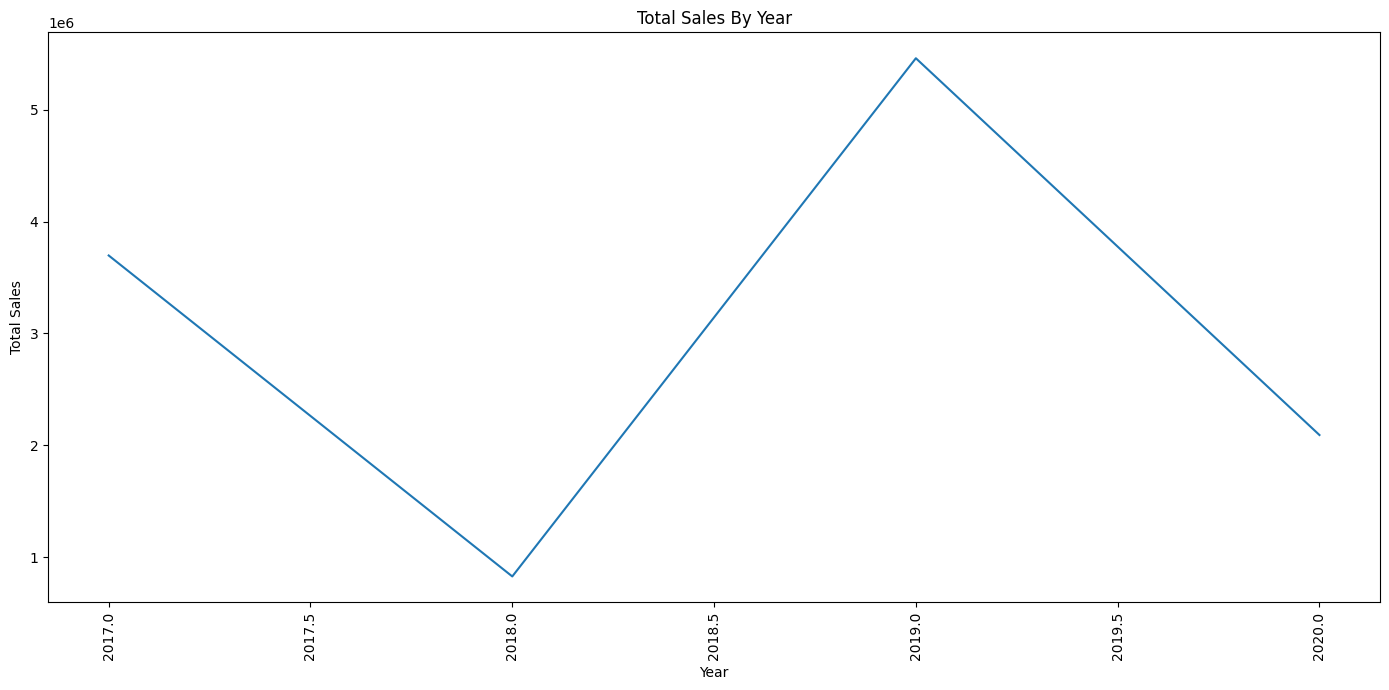

In [33]:
# Overall Total Sales by year
yearly_sales = df.groupby('YEAR')['TOTAL SALES'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.tight_layout()


Text(0.5, 1.0, 'Correlation Heatmap')

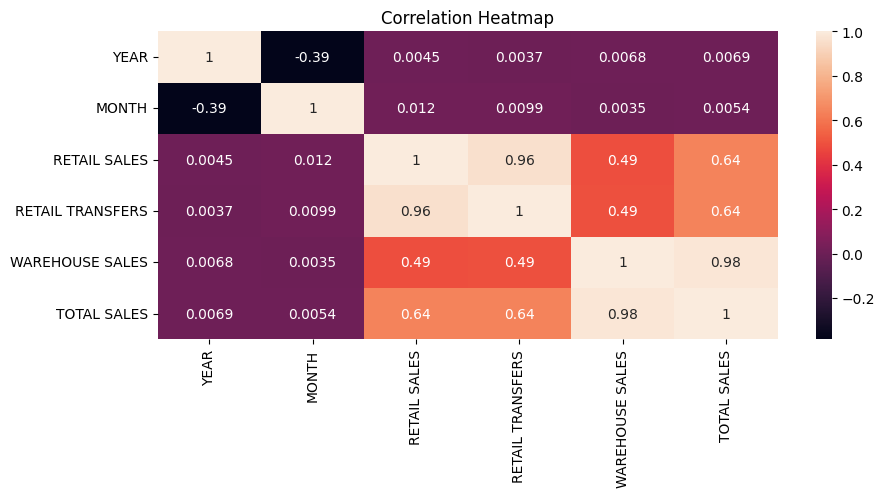

In [34]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title("Correlation Heatmap")


## Business Questions
what is the item type with the largest total(warehouse and retail) sales?

Text(0, 0.5, 'Total Sales')

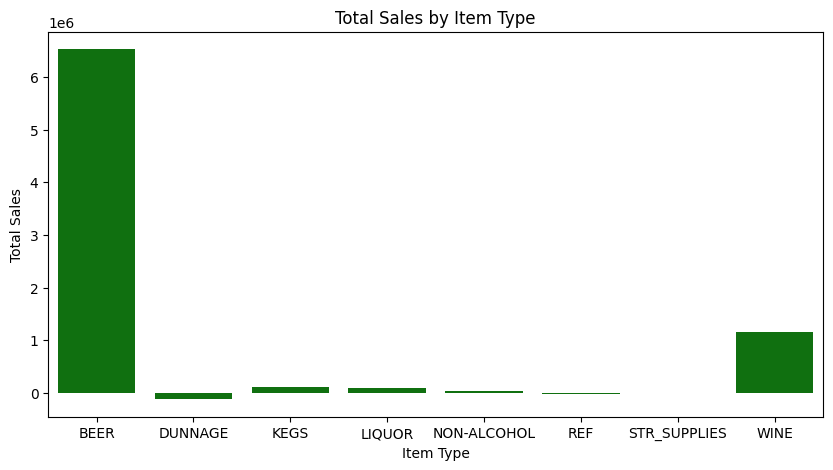

In [35]:
cat_total = df.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='green')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

### what is the year with the biggest sales?


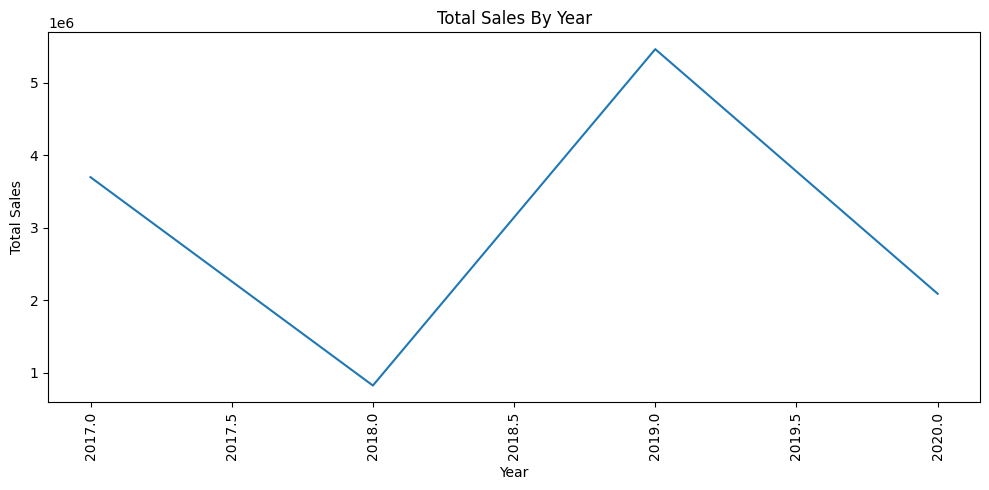

In [38]:
yearly_sales = df.groupby('YEAR')['TOTAL SALES'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.tight_layout()

###what is the item type with the most unprofitable retail sales?


Text(0, 0.5, 'Average Retail Sales')

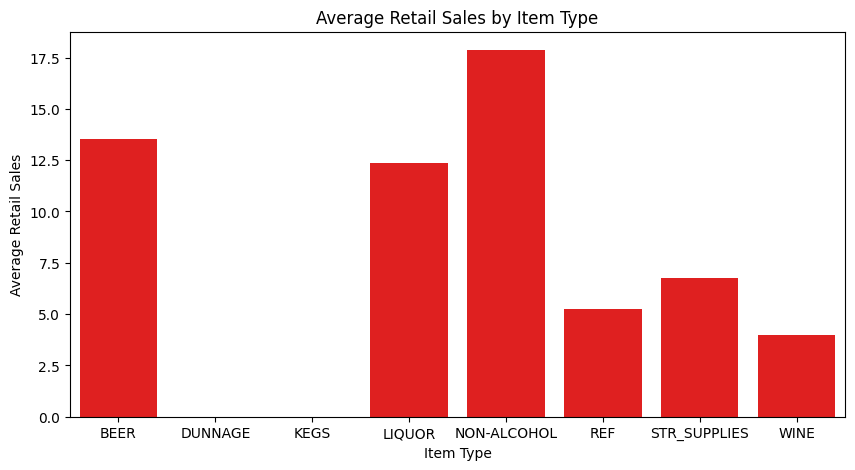

In [37]:
cat_total = df.groupby('ITEM TYPE')['RETAIL SALES'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='red')

plt.title('Average Retail Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Retail Sales')